In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error


# Classification task predicting diabetes among Pima Indians

In [35]:
dat = loadtxt(os.getcwd()+'/pima-indians-diabetes.data.csv', delimiter=",")

In [65]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

x = dat[:,0:8]
y = dat[:,8].astype('int')

seed = 7
test_size = .33
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = test_size)
model = ensemble.GradientBoostingClassifier()
model.fit(x_train, y_train)
mse = mean_squared_error(y_test, model.predict(x_test))
print('MSE: %.4f' % mse)

MSE: 0.2795


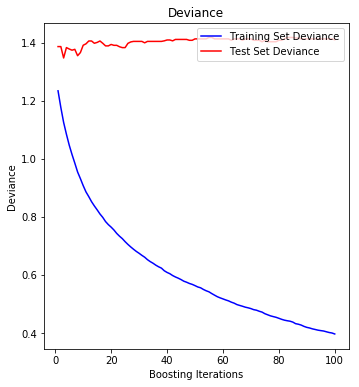

In [67]:
test_score = np.zeros((100,), dtype = np.float64)
for x,y_pred in enumerate(model.staged_predict(x_test)):
    test_score[x] = model.loss_(y_test, y_pred)
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()
